<a href="https://colab.research.google.com/github/guru-divine/Machine-Learning/blob/main/hr_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from sklearn import linear_model

In [2]:
df = pd.read_csv("hr_data.csv")
df

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [3]:
df.experience = df.experience.fillna("zero")
df

,experience,test_score,interview_score,salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [5]:
df.test_score = df.test_score.fillna(math.floor(df.test_score.median()))
df

,experience,test_score,interview_score,salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [6]:
pip install word2number

  Preparing metadata (setup.py) ... done
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5568 sha256=31cc161d1ec053d73b3e70833a8e56c585c1ee5cfca3777220ce48251b9932a0
  Stored in directory: /root/.cache/pip/wheels/84/ff/26/d3cfbd971e96c5aa3737ecfced81628830d7359b55fbb8ca3b
Successfully built word2number


In [7]:
from word2number import w2n
df.experience = df.experience.apply(w2n.word_to_num)
df

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


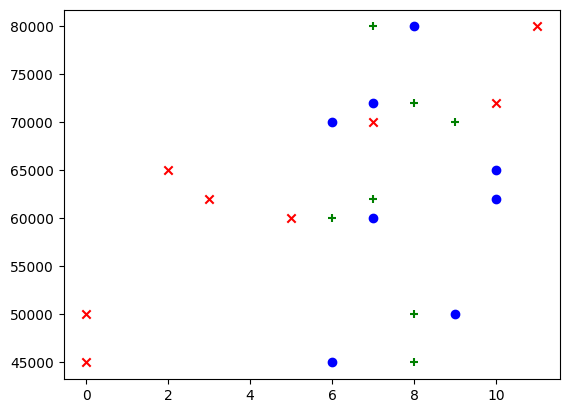

In [9]:
plt.scatter(df.experience, df.salary, marker='x', color='red')
plt.scatter(df.test_score, df.salary, marker='+', color='green')
plt.scatter(df.interview_score, df.salary, marker='o', color='blue')

In [11]:
reg = linear_model.LinearRegression()
reg.fit(df[['experience', 'test_score', 'interview_score']], df.salary)

LinearRegression()

In [13]:
print(reg.coef_)
print(reg.intercept_)

[2812.95487627 1845.70596798 2205.24017467]
17737.263464337688


In [19]:
import joblib
joblib.dump(reg, 'hr_model')

['hr_model']

In [20]:
hr = joblib.load('hr_model')

In [21]:
reg.predict([[10, 8, 9]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([80479.62154294])

In [23]:
hr.predict([[10,8,9]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([80479.62154294])